In [25]:
import pandas as pd

In [26]:
# Read the file 
data = pd.read_csv('data/data1analytical_with_avg_clust.csv')
data

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area,cluster,Price Tier
0,2022,June,4008,SWEET BAKERY SNACKS,24.0,24.40,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate
2,2022,August,5122,ΟΥΖΟ,3.0,11.00,MATYA,Kiosk,Δυτική και Κεντρική Ελλάδα,2,Moderate
3,2022,June,10254,CORN,51.0,74.00,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate
4,2022,October,10280,STICK,122.0,277.80,MATYA,Kiosk,Αττική,1,Cheap
...,...,...,...,...,...,...,...,...,...,...,...
351094,2023,March,7986,WHISKY,1.0,23.00,MAT,Mini-Market,Μακεδονία και Θράκη,2,Moderate
351095,2023,January,6532,SANDWICH,29.0,48.50,MAT,Kiosk,Νησιά,0,Expensive
351096,2023,January,3545,ICE TEA,11.0,20.00,MAT,Mini-Market,Αττική,0,Expensive
351097,2022,December,3813,COLAS,364.0,653.64,MAT,Kiosk,Πελοπόννησος,1,Cheap


## Now create a column named basket-mission for each row where:

1) If the Sub-Category is CIG then the basket-mission is Factory Cigarettes
2) If the Sub-Category is RYO or TOBACCO ACCESSORIES  then the basket-mission is Roll Your Own
3) If the Sub-Category is NATURAL WATER then the basket-mission is Natural Water
4) If the Sub-Category is CHIPS or FLAVORS or COLAS then the basket-mission is Chips & Drinks
5) If the Sub-Category is ENERGY DRINK then the basket-mission is Energy Drinks
6) If the Sub-Category is BEERS or = then the basket-mission is Beers
7) If the Sub-Category is HEATED then the basket-mission is Heated Devices
8) If the Sub-Category is Packaged Food then the basket-mission is Packaged Food

Keep only these basket-missions and remove the rest of the rows from the dataset

In [27]:
# Define a function to assign basket-mission based on Sub-Category
def assign_basket_mission(sub_category):
    sub_category = sub_category.strip().upper()
    if sub_category == 'CIG':
        return 'Factory Cigarettes'
    elif sub_category in ['RYO', 'TOBACCO ACCESSORIES']:
        return 'Roll Your Own'
    elif sub_category  == 'NATURAL WATER':
        return 'Natural Water'
    elif sub_category in ['CHIPS', 'FLAVORS', 'COLAS']:
        return 'Chips & Drinks'
    elif sub_category == 'ENERGY DRINK':
        return 'Energy Drinks'
    elif sub_category in ['BEERS']:
        return 'Beers'
    elif sub_category == 'HEATED':
        return 'Heated Devices'
    elif sub_category == 'PACKAGED FOOD':
        return 'Packaged Food'
    else:
        return None

# Apply the function to create the new 'basket-mission' column
data['basket-mission'] = data['Subcategory'].apply(assign_basket_mission)

# Filter the dataframe to keep only the specified basket-missions
data = data.dropna(subset=['basket-mission'])

In [28]:
data

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area,cluster,Price Tier,basket-mission
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,MATYA,Kiosk,Μακεδονία και Θράκη,2,Moderate,Roll Your Own
7,2022,September,10812,CHIPS,489.0,895.20,MATYA,Mini-Market,Δυτική και Κεντρική Ελλάδα,1,Cheap,Chips & Drinks
9,2022,August,10812,RYO,183.0,1401.30,MATYA,Mini-Market,Δυτική και Κεντρική Ελλάδα,1,Cheap,Roll Your Own
11,2022,July,5705,HEATED,1317.0,5060.30,MATYA,Kiosk,Μακεδονία και Θράκη,1,Cheap,Heated Devices
14,2022,July,3950,RYO,1135.0,8845.30,MATYA,Kiosk,Αττική,2,Moderate,Roll Your Own
...,...,...,...,...,...,...,...,...,...,...,...,...
351063,2023,April,3484,CHIPS,122.0,197.10,MAT,Kiosk,Μακεδονία και Θράκη,1,Cheap,Chips & Drinks
351075,2023,March,6238,NATURAL WATER,969.0,1308.10,MAT,Mini-Market,Μακεδονία και Θράκη,0,Expensive,Natural Water
351077,2023,March,6582,COLAS,654.0,835.40,MAT,Kiosk,Αττική,2,Moderate,Chips & Drinks
351089,2023,January,4099,FLAVORS,184.0,207.90,MAT,Mini-Market,Μακεδονία και Θράκη,2,Moderate,Chips & Drinks


In [29]:
data['basket-mission'].unique()

array(['Roll Your Own', 'Chips & Drinks', 'Heated Devices',
       'Packaged Food', 'Energy Drinks', 'Natural Water',
       'Factory Cigarettes', 'Beers'], dtype=object)

In [30]:
# Group by Price Tier and basket-mission and count each basket-mission
grouped_data = data.groupby(['Date_Year','Date_MonthName','Price Tier', 'Area', 'basket-mission']).agg({'Quantity': 'sum'}).reset_index()
grouped_data

,Date_Year,Date_MonthName,Price Tier,Area,basket-mission,Quantity
0,2021,December,Cheap,Αττική,Beers,7919.0
1,2021,December,Cheap,Αττική,Chips & Drinks,7053.0
2,2021,December,Cheap,Αττική,Energy Drinks,5118.0
3,2021,December,Cheap,Αττική,Factory Cigarettes,39364.0
4,2021,December,Cheap,Αττική,Heated Devices,9440.0
...,...,...,...,...,...,...
3259,2023,September,Moderate,Πελοπόννησος,Factory Cigarettes,63859.0
3260,2023,September,Moderate,Πελοπόννησος,Heated Devices,13792.0
3261,2023,September,Moderate,Πελοπόννησος,Natural Water,8374.0
3262,2023,September,Moderate,Πελοπόννησος,Packaged Food,1714.0


In [9]:
grouped_data.to_csv('powerbi.csv', index=False)

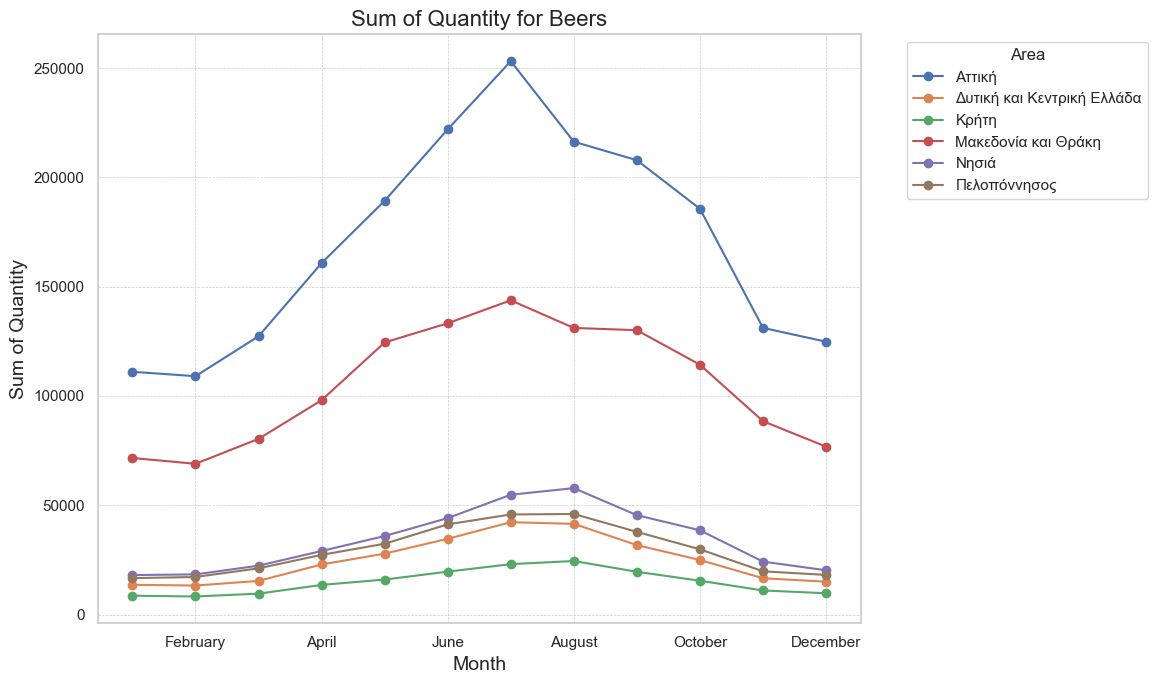

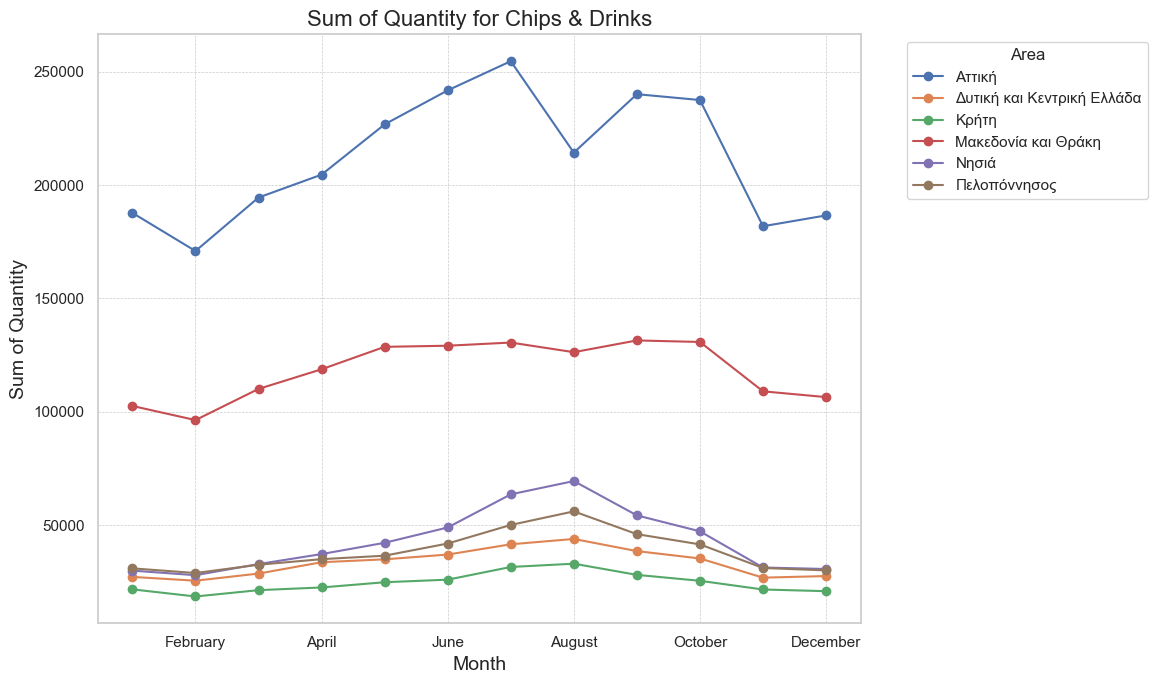

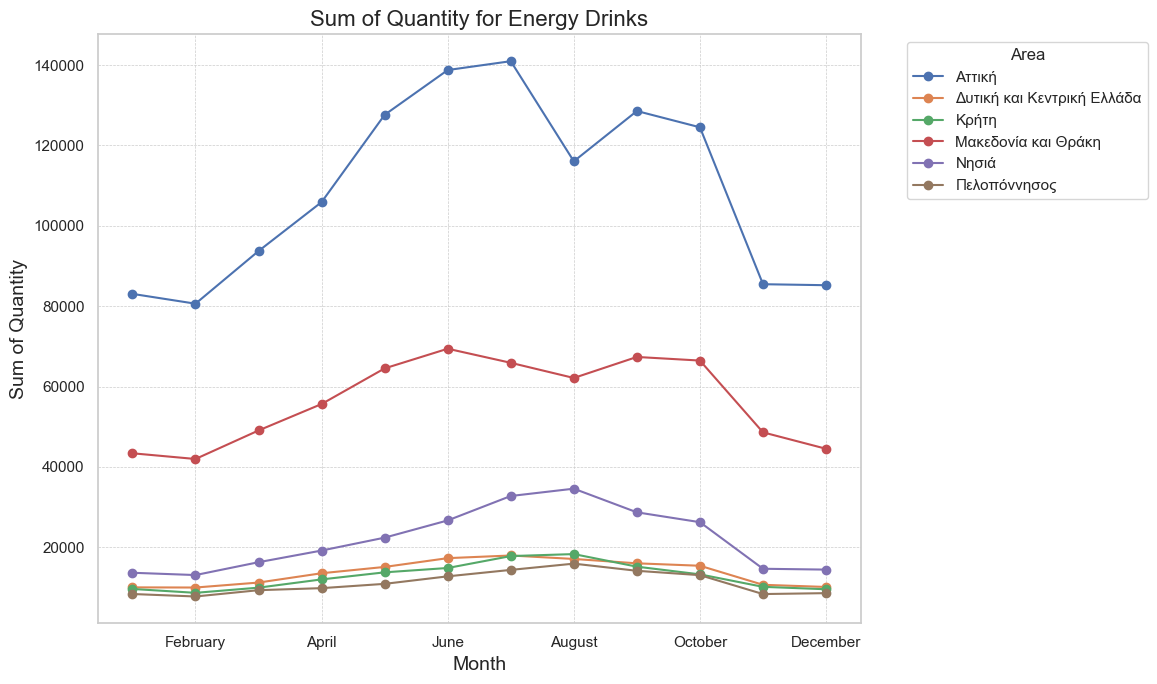

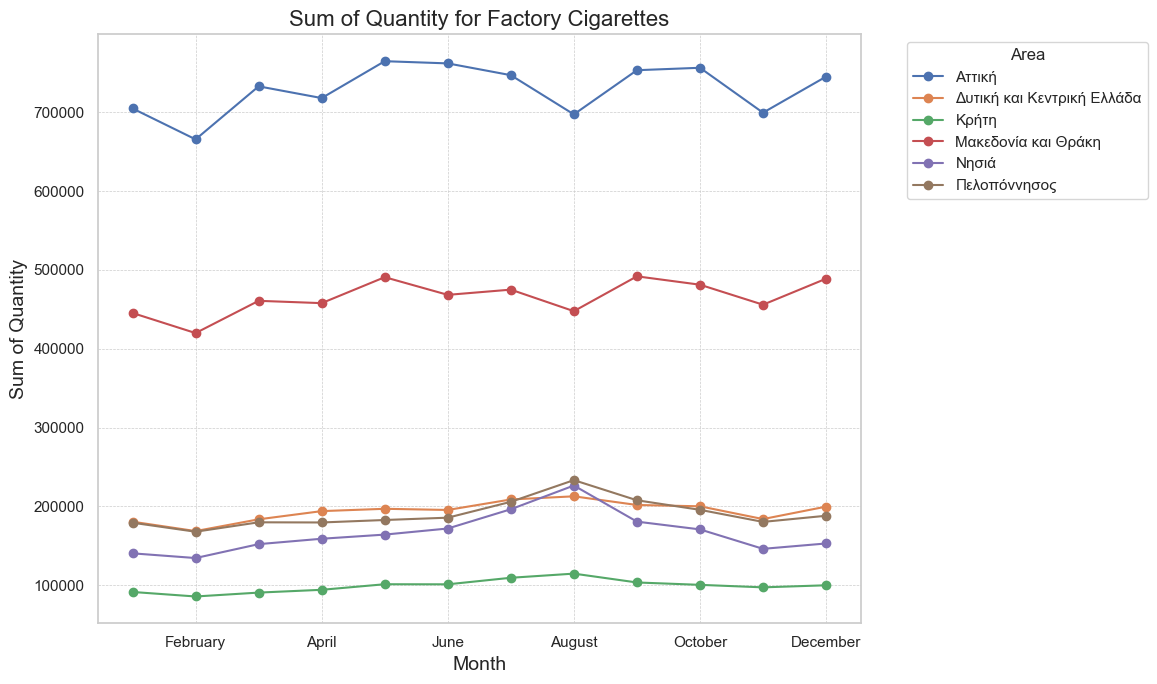

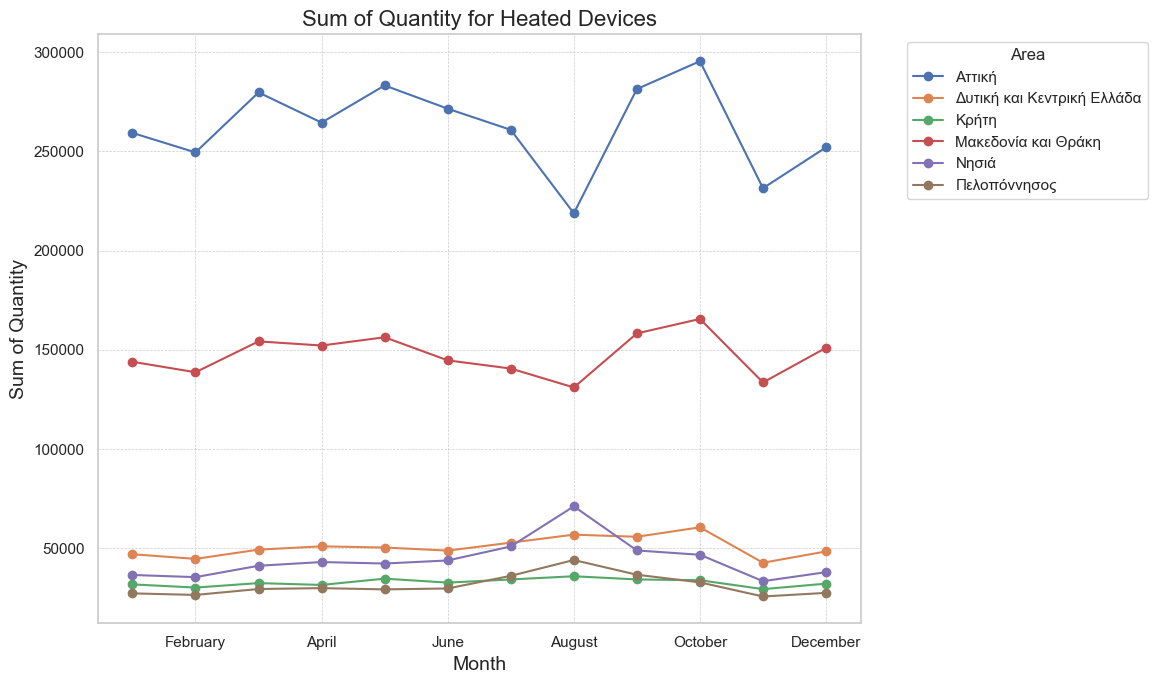

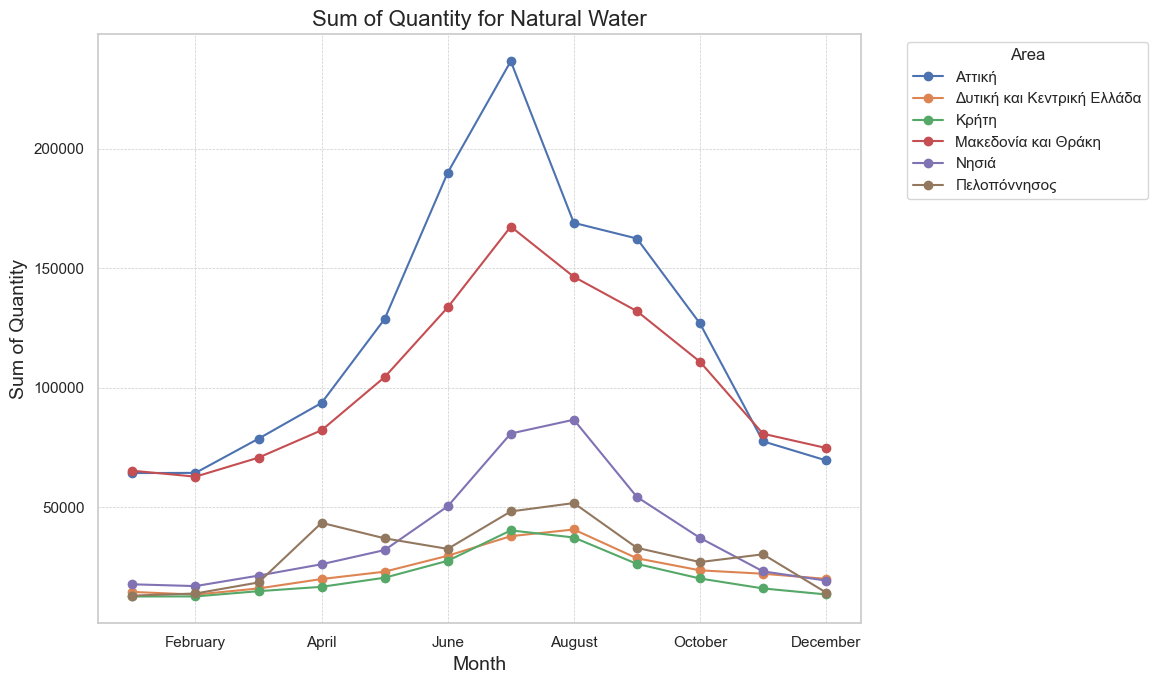

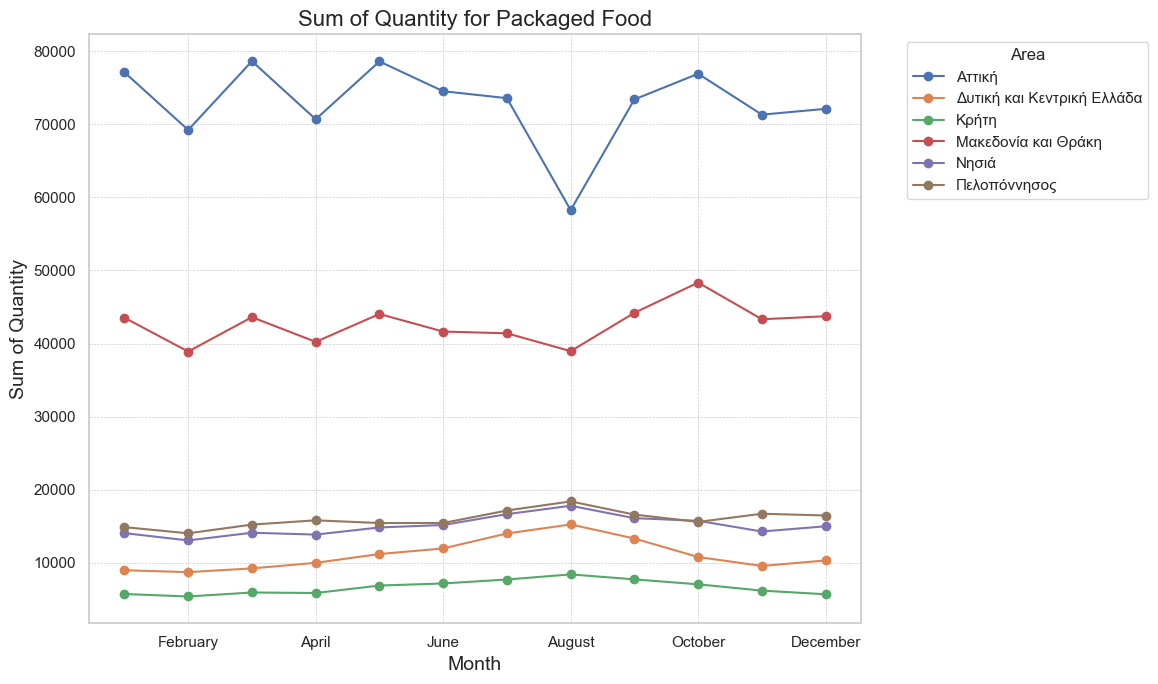

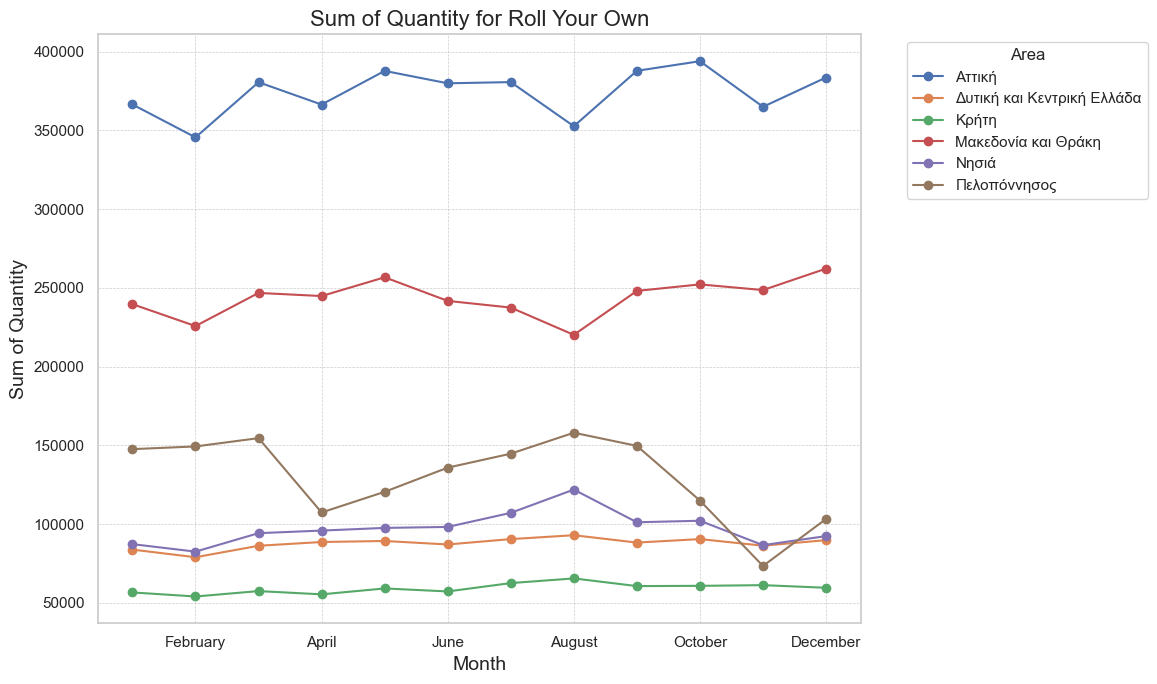

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import MaxNLocator
df = grouped_data


# Map the month names to numbers
month_to_num = {name: num for num, name in enumerate(calendar.month_name) if name}
df['Month'] = df['Date_MonthName'].map(month_to_num)

# Create a 'Date' column combining 'Month' and 'Date_Year'
df['Date'] = pd.to_datetime(df['Date_Year'].astype(str) + '-' + df['Month'].astype(str))

# Set 'Date' as the DataFrame index
df.set_index('Date', inplace=True)

# Get a list of unique basket-missions
basket_missions = df['basket-mission'].unique()

# Create a plot for each basket-mission
for mission in basket_missions:
    plt.figure(figsize=(14, 7))
    
    # Filter the DataFrame for the current basket-mission
    mission_data = df[df['basket-mission'] == mission]
    
    # Group the data by 'Area' and month and calculate the sum of 'Revenue'
    mission_monthly_revenue = mission_data.groupby([mission_data.index.month, 'Area'])['Quantity'].sum().unstack()
    
    # Sort the DataFrame by month for proper plotting
    mission_monthly_revenue = mission_monthly_revenue.sort_index()
    
    # Plot each 'Area'
    for area in mission_monthly_revenue.columns:
        plt.plot(mission_monthly_revenue.index, mission_monthly_revenue[area], marker='o', label=area)

    # Add title and labels
    plt.title(f'Sum of Quantity for {mission}', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Sum of Quantity', fontsize=14)
    plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    
    # Improve the legend
    plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ensure the x-axis only shows integer values for months
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Add grid lines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Adjust layout to prevent clipping of labels and to fit the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
# Show the plot
plt.show()
    
  # Adjust layout to prevent clipping of labels
# Show the plot
#plt.show()

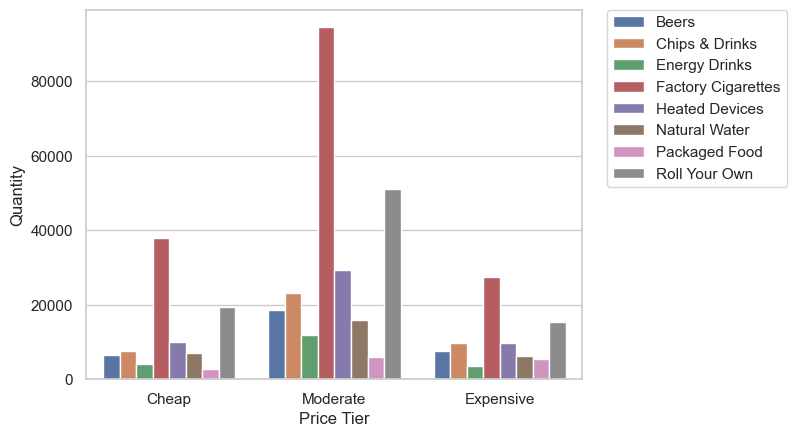

In [33]:
# Create a plot showing the count of each basket-mission for each Price Tier
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Price Tier' to a categorical variable with a specific order
grouped_data['Price Tier'] = pd.Categorical(grouped_data['Price Tier'], categories=["Cheap", "Moderate", "Expensive"], ordered=True)

sns.set(style="whitegrid")
ax = sns.barplot(x="Price Tier", y="Quantity", hue="basket-mission", data=grouped_data, errorbar=None)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [39]:
# Do two-way ANOVA to see if there is a significant difference in Revenue of each basket-mission for each Price Tier
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Quantity ~ C(Q("basket-mission")) + C(Q("Price Tier"))', data=grouped_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                              sum_sq      df           F         PR(>F)
C(Q("basket-mission"))  7.629621e+11     7.0  159.732962  2.114042e-203
C(Q("Price Tier"))      3.022566e+11     2.0  221.480436   6.603497e-91
Residual                2.220383e+12  3254.0         NaN            NaN


In [41]:
# Do cross-tabulation to see the count of each basket-mission for each Price Tier
crosstabs = pd.crosstab(grouped_data['Price Tier'], grouped_data['basket-mission'], values=grouped_data['Quantity'], aggfunc='sum')
crosstabs

basket-mission,Beers,Chips & Drinks,Energy Drinks,Factory Cigarettes,Heated Devices,Natural Water,Packaged Food,Roll Your Own
Price Tier,,,,,,,,
Cheap,780740.0,901774.0,491748.0,4561262.0,1198554.0,857813.0,329966.928,2320531.646
Moderate,2674638.0,3335458.0,1696743.0,13618463.0,4232192.0,2300150.0,856748.000,7370369.587
Expensive,1085607.0,1395525.0,515702.0,3943036.0,1396198.0,907895.0,785282.400,2216203.050


In [42]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstabs)
print('Chi-square statistic:', chi2)
print('p-value:', p)


Chi-square statistic: 752357.7279701321
p-value: 0.0


In [43]:
percentage_change = (crosstabs - expected) / expected * 100
percentage_change

basket-mission,Beers,Chips & Drinks,Energy Drinks,Factory Cigarettes,Heated Devices,Natural Water,Packaged Food,Roll Your Own
Price Tier,,,,,,,,
Cheap,-10.186468,-16.369998,-5.007278,7.703820,-8.290003,10.211225,-12.592338,1.804448
Moderate,-2.435180,-1.912703,3.933771,1.968744,2.687440,-6.290794,-28.034378,2.532468
Expensive,16.694401,20.932785,-6.913097,-13.000078,-0.172977,8.996077,94.377947,-9.148764


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:

# Assuming 'grouped_data' is your DataFrame with 'Price Tier', 'basket-mission', and 'Count' columns

# Create a pivot table for the heatmap
pivot_table = grouped_data.pivot(index='Price Tier', columns='basket-mission', values='Revenue')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")

# Add titles and labels
plt.title('Heatmap of Count by Basket-Mission and Price Tier')
plt.xlabel('Basket-Mission')
plt.ylabel('Price Tier')

# Show the plot
plt.show()

KeyError: 'Revenue'